In [1]:
import sys, os
import pandas as pd
sys.path.append(os.path.realpath('..'))
from MiningBot.AuditHistory.History import History
import json
import socket
from datetime import datetime, timedelta

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import matplotlib.colors as mc
import mplcyberpunk
plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [3]:
config_dir = r'../MiningBot/Configs/configs.json'
config = json.load(open(config_dir))[socket.gethostname()]

In [4]:
log = History(config_dir=config_dir)

In [5]:
records = log.get_all()

In [6]:
df = pd.DataFrame(records)
df = df.sort_values(by='datetime', ascending=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['timedelta'] = df['datetime'].diff().dt.seconds.div(60, fill_value=0)
df

,_id,datetime,action,context,timedelta
685,63f6ab42dee95f36d2d98366,2023-02-22 23:54:42.255,Extraction,,0.000000
684,63f6ab3adee95f36d2d98365,2023-02-22 23:54:34.779,Navigating,Site Three Alpha,1439.866667
683,63f6aaf6dee95f36d2d98364,2023-02-22 23:53:26.309,Navigating,Site One Alpha,1438.850000
682,63f6aab1dee95f36d2d98363,2023-02-22 23:52:17.849,Navigating,Site Two Alpha,1438.850000
681,63f6aa35dee95f36d2d98362,2023-02-22 23:50:13.819,Unload,,1437.916667
...,...,...,...,...,...
4,63f42151d2bfb6cfc297a6f4,2023-02-21 01:41:37.885,Extraction,,1431.383333
3,63f41f4dd2bfb6cfc297a6f3,2023-02-21 01:33:01.297,Extraction,,1431.383333
2,63f41dfcd2bfb6cfc297a6f2,2023-02-21 01:27:24.965,Extraction,,1434.383333
1,63f41cacd2bfb6cfc297a6f1,2023-02-21 01:21:48.775,Extraction,,1434.383333


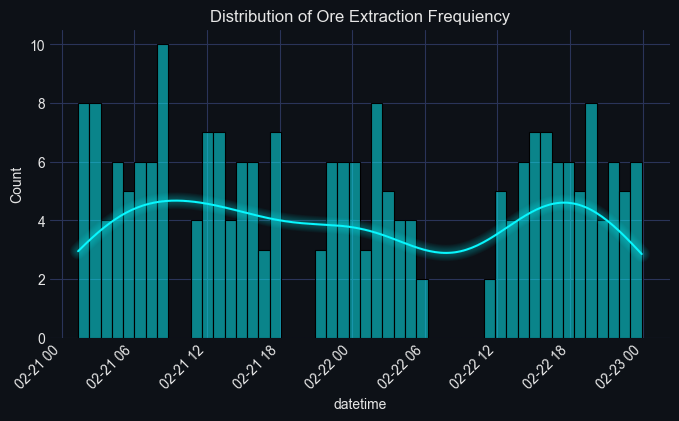

In [7]:
histplot_hyperparams = {
    'kde':True,
    'alpha':0.5,
    #'stat':'percent',
    'bins':50
}


n_cols = 1
n_rows = 1
cell_with_dim = 8
cell_height_dim = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
plt.title('Distribution of Ore Extraction Frequiency')
sns.histplot(df[df['action']=='Extraction']['datetime'], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
plt.xticks(rotation=45, ha='right')
mplcyberpunk.make_lines_glow(ax)